# HEART FAILURE EARLY DETECTION

### IMPORT ALL LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#!pip install imbalanced-learn
#!pip install mlxtend
#!pip install keras
#!pip install tensorflow
#!pip install vecstack

### READ THE DATASET

In [192]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### FIND ANY MISSING VALUES

In [193]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### INFORMATION ON DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### OBSERVATIONS PRESENT IN TARGET VARIABLE

In [5]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### SEPERATE INDEPENDENT AND DEPENDENT (TARGET) VARIABLES

In [6]:
X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

### SCALE THE INDEPENDENT VARIABLES

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

### SPLIT DATA INTO TRAINING AND TEST DATASETS

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

### DEFINE XGBCLASSIFIER

In [157]:
from xgboost import XGBClassifier
model = XGBClassifier()

### DO OVERSAMPLING FOR THE IMBALANCED DATASET

In [11]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 83
Before OverSampling, counts of label '0': 156 

After OverSampling, the shape of train_X: (312, 12)
After OverSampling, the shape of train_y: (312,) 

After OverSampling, counts of label '1': 156
After OverSampling, counts of label '0': 156


### DEFINE RANDOM SEARCH

In [12]:
from sklearn.model_selection import RandomizedSearchCV

### DEFINE RANDOM FOREST PARAMETERS

In [25]:
random_grid = {'n_estimators': range(100,2000),
               'max_depth': range(1,100),
               'min_samples_split': range(1,10),
               'min_samples_leaf': range(1,10)}

### DEFINE RANDOM FOREST

In [141]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

### TRAIN, TEST AND EVALUATE THE COST EFFECTIVE RANDOM FOREST ALGORITHM

In [142]:
randomized_mse_rft = RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=50, scoring='balanced_accuracy', cv=4, verbose=1,n_jobs=-1)
randomized_mse_rft.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


F:\DataScience\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8033196  0.81277473        nan 0.8095696  0.8077381  0.81369048
 0.8132326  0.81277473 0.8095696  0.81369048 0.8132326  0.81277473
 0.81643773 0.79981685 0.81369048        nan 0.81918498 0.81277473
 0.8077381  0.79874084 0.81247711 0.81872711 0.80927198 0.81643773
 0.81277473 0.8095696  0.81568223 0.82239011 0.81369048 0.80927198
 0.80927198        nan 0.81918498 0.80286172        nan 0.81872711
 0.80606685 0.81918498 0.81964286 0.81552198        nan 0.8014881
 0.8033196  0.81048535 0.81597985 0.8014881         nan 0.80728022
 0.80744048 0.77554945]
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 100),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(100, 2000)},
                   scoring='balanced_accuracy', verbose=1)

In [143]:
rf = randomized_mse_rft.predict(X_test)

In [144]:
print('Final prediction score: [%.8f]' % accuracy_score(y_test, rf))

Final prediction score: [0.93333333]


In [146]:
from sklearn.metrics import confusion_matrix
t=confusion_matrix(y_test, rf)

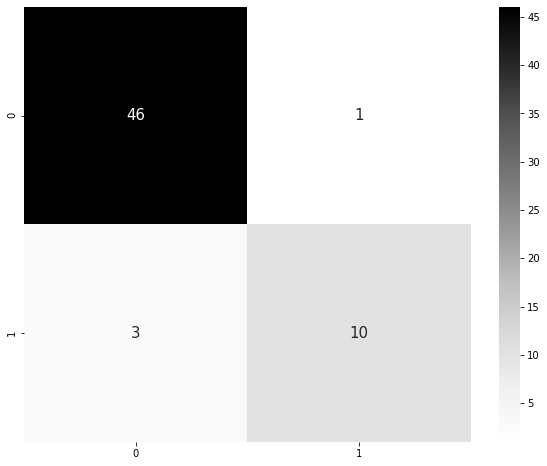

(60, 12)

In [147]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(t, cmap="Greys", annot=True, annot_kws={"size":15}, fmt="g")
ax.set_ylim(2, 0)
plt.show()
X_test.shape

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [179]:
print("Accuracy: {}".format(accuracy_score(y_test, rf)))
print("Precision: {}".format(precision_score(y_test, rf)))
print("Recall: {}".format(recall_score(y_test, rf)))
print("F1: {}".format(f1_score(y_test, rf)))

Accuracy: 0.9333333333333333
Precision: 0.9090909090909091
Recall: 0.7692307692307693
F1: 0.8333333333333333


### DEFINE THE PARAMETERS OF XGBCLASSIFIER

In [20]:
gbm_param_grid_final = {
  'colsample_bytree': range(0, 1),
    'n_estimators': range(50,100),
    'max_depth': range(1, 10)
}

### DEFINE GRIDSEARCH

In [21]:

from sklearn.model_selection import GridSearchCV

### TRAIN, TEST, AND EVALUATE THE XGBCLASSIFIER ALGORITHM

In [158]:
Grid_mse = GridSearchCV(estimator=model,param_grid=gbm_param_grid_final, scoring='balanced_accuracy', cv=4, verbose=1,n_jobs=-1)

In [159]:
Grid_mse.fit(X_train_res,y_train_res)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[12:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

### BEST XGBCLASSIFIER ESTIMATOR

In [45]:
xgb=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=None, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None)

In [166]:
Grid_mse.best_score_

0.8653846153846153

### TRAIN, TEST, AND EVALUATE NON-COST SENSITIVE RANDOM FOREST ALGORITHM

In [27]:
randomized_mse_rf = RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=50, scoring='balanced_accuracy', cv=4, verbose=1,n_jobs=-1)

In [28]:
randomized_mse_rf.fit(X_train_res,y_train_res)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


F:\DataScience\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.85576923        nan 0.86217949 0.8525641  0.86217949 0.86217949
 0.86538462 0.85897436 0.86217949 0.86217949        nan 0.8525641
 0.86217949 0.86217949        nan 0.8525641  0.86217949 0.85897436
 0.85897436 0.86538462 0.86858974        nan 0.8525641  0.86217949
 0.86217949 0.8525641  0.86217949 0.85897436 0.85897436 0.85897436
 0.8525641  0.86217949 0.8525641  0.85576923 0.86217949 0.86538462
        nan 0.86217949 0.84615385        nan 0.86538462 0.86538462
 0.83333333 0.86217949 0.85576923 0.85897436 0.84935897        nan
 0.86858974 0.86217949]
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 100),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(100, 2000)},
                   scoring='balanced_accuracy', verbose=1)

In [29]:
randomized_mse_rf.best_score_

0.8685897435897436

### STACK THE MODELS OF NON-COST-SENSITIVE RANDOM FOREST AND XGBCLASSIFIER ALGORITHMS WITH MLXTEND

In [39]:
from mlxtend.classifier import StackingClassifier

In [174]:
clf_stack=StackingClassifier(classifiers=[randomized_mse_rf.best_estimator_,Grid_mse.best_estimator_],meta_classifier=randomized_mse_rf.best_estimator_,use_features_in_secondary=False)
clf_stack.fit(X_train_res, y_train_res)

F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(classifiers=[RandomForestClassifier(max_depth=69,
                                                       min_samples_leaf=5,
                                                       min_samples_split=6,
                                                       n_estimators=1939),
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=6,
                                              min_child_weight=1, missing=nan,
                                 

### OVERFITTING CHECK

In [175]:
print("Accuracy: {:0.4f}".format(accuracy_score(y_train, clf_stack.predict(X_train))))

Accuracy: 1.0000


### OVERFITTING DETECTED MOVE ONTO NEXT TRAINING METHOD

In [176]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, clf_stack.predict(X_test))))

Accuracy: 0.8500


### DEFINE ADABOOSTCLASSIFIER

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
abc =AdaBoostClassifier()

### DEFINE ADABOOST PARAMETERS

In [83]:
abc_param_grid_final = {
    'n_estimators': range(50,100)
}

### TRAIN, TEST, AND EVALUATE THE ADABOOST ALGORITHM

In [85]:
Grid_mse_abc = GridSearchCV(estimator=abc,param_grid=abc_param_grid_final, scoring='balanced_accuracy', cv=4, verbose=1,n_jobs=-1)

In [86]:
Grid_mse_abc.fit(X_train_res,y_train_res)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': range(50, 100)},
             scoring='balanced_accuracy', verbose=1)

In [87]:
Grid_mse_abc.best_estimator_

AdaBoostClassifier(n_estimators=52)

In [88]:
Grid_mse_abc.best_score_

0.8237179487179488

### DEFINE BEST ADABOOST ESTIMATOR

In [112]:
ABC=AdaBoostClassifier(n_estimators=52,base_estimator=randomized_mse_rf.best_estimator_)

### DEFINE STACKING

In [194]:
from vecstack import stacking

### STACK XGBCLASSIFIER, RANDOM FOREST, ADABOOST CLASSIFIER WITH VECSTACK METHOD AND TRAIN, TEST, AND EVALUATE THIS METHOD

In [115]:
stacked_models = [ABC,randomized_mse_rf.best_estimator_,xgb]
# Stack the models: stack_train, stack_test
stack_train, stack_test = stacking(stacked_models, X_train_res, y_train_res, X_test, regression=False, mode='oof_pred_bag',
needs_proba=False, metric=accuracy_score, n_folds=4, stratified=True, shuffle=True, random_state=0, verbose=2)
# Initialize and fit 2nd level model
final_model = ABC
final_model_fit = final_model.fit(stack_train, y_train_res)
# Predict: stacked_pred
stacked_pred = final_model.predict(stack_test)
# Final prediction score
print('Final prediction score: [%.8f]' % accuracy_score(y_test, stacked_pred))

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [AdaBoostClassifier]
    fold  0:  [0.88461538]
    fold  1:  [0.88461538]
    fold  2:  [0.88461538]
    fold  3:  [0.84615385]
    ----
    MEAN:     [0.87500000] + [0.01665433]
    FULL:     [0.87500000]

model  1:     [RandomForestClassifier]
    fold  0:  [0.88461538]
    fold  1:  [0.88461538]
    fold  2:  [0.88461538]
    fold  3:  [0.79487179]
    ----
    MEAN:     [0.86217949] + [0.03886011]
    FULL:     [0.86217949]

model  2:     [XGBClassifier]
[21:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    fold  0:  [0.85897436]
[21:40:48] WARNING: C:/Users/Administrator/workspace/xgbo

F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is


[21:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    fold  2:  [0.85897436]
[21:40:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    fold  3:  [0.87179487]

F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



    ----
    MEAN:     [0.86858974] + [0.01063021]
    FULL:     [0.86858974]

Final prediction score: [0.90000000]


In [135]:
o=confusion_matrix(y_test, stacked_pred)

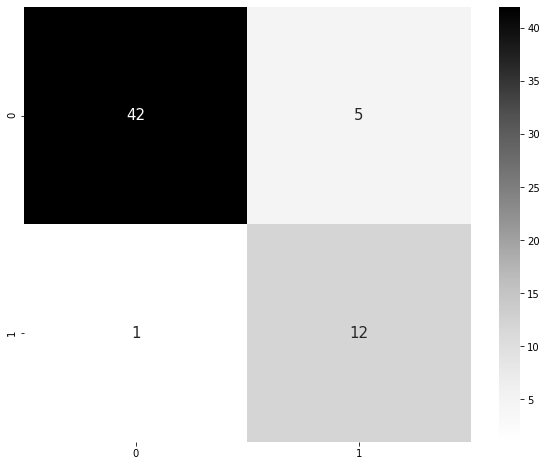

(60, 12)

In [136]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(o, cmap="Greys", annot=True, annot_kws={"size":15}, fmt="g")
ax.set_ylim(2, 0)
plt.show()
X_test.shape

In [177]:
print("Accuracy: {}".format(accuracy_score(y_test, stacked_pred)))
print("Precision: {}".format(precision_score(y_test, stacked_pred)))
print("Recall: {}".format(recall_score(y_test, stacked_pred)))
print("F1: {}".format(f1_score(y_test, stacked_pred)))

Accuracy: 0.9
Precision: 0.7058823529411765
Recall: 0.9230769230769231
F1: 0.8000000000000002


### UNDERSAMPLING TO ADDRESS THE IMBALANCE IN THE DATASET.

In [181]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
X_train_und, y_train_und = under.fit_resample(X_train, y_train.ravel()) 
  
print('After UnderSampling, the shape of train_X: {}'.format(X_train_und.shape)) 
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_und.shape)) 
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_und == 1))) 
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_und == 0))) 

Before UnderSampling, counts of label '1': 83
Before UnderSampling, counts of label '0': 156 

After UnderSampling, the shape of train_X: (166, 12)
After UnderSampling, the shape of train_y: (166,) 

After UnderSampling, counts of label '1': 83
After UnderSampling, counts of label '0': 83


### TRAIN, TEST AND EVALUATE THE UNDERSAMPLING METHOD

In [182]:
Grid_mse.fit(X_train_und,y_train_und)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[13:54:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [183]:
Grid_mse.best_score_

0.8565476190476191

In [184]:
randomized_mse_rfu = RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=50, scoring='balanced_accuracy', cv=4, verbose=1,n_jobs=-1)
randomized_mse_rfu.fit(X_train_und,y_train_und)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


F:\DataScience\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.85654762 0.86845238 0.86815476 0.85654762 0.84464286 0.87380952
 0.87410714 0.88035714 0.85654762 0.87380952 0.85059524 0.85654762
 0.87380952        nan 0.84464286 0.85625    0.86785714 0.85654762
 0.85654762 0.85595238 0.85625           nan 0.86220238 0.86785714
 0.85059524        nan 0.85059524 0.85654762 0.85654762 0.86815476
 0.84464286 0.87440476        nan 0.85654762 0.88035714 0.8625
        nan 0.8625     0.87380952 0.86220238 0.86845238 0.85029762
 0.85059524 0.84404762 0.85654762        nan 0.88035714 0.86815476
 0.86815476 0.86220238]
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 100),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(100, 2000)},
                   scoring='balanced_accuracy', verbose=1)

In [185]:
randomized_mse_rfu.best_score_

0.8803571428571428

In [186]:
Grid_mse_abc.fit(X_train_und,y_train_und)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': range(50, 100)},
             scoring='balanced_accuracy', verbose=1)

In [189]:
Grid_mse_abc.best_score_

0.831547619047619

In [188]:
ABC_under=AdaBoostClassifier(n_estimators=56,base_estimator=randomized_mse_rfu.best_estimator_)

In [191]:
stacked_models9 = [ABC_under,randomized_mse_rfu.best_estimator_,Grid_mse.best_estimator_]
# Stack the models: stack_train, stack_test
stack_train9, stack_test9 = stacking(stacked_models9, X_train_und, y_train_und, X_test, regression=False, mode='oof_pred_bag',
needs_proba=False, metric=accuracy_score, n_folds=4, stratified=True, shuffle=True, random_state=0, verbose=2)
# Initialize and fit 2nd level model
final_model9 = randomized_mse_rfu.best_estimator_
final_model_fit9 = final_model9.fit(stack_train9, y_train_und)
# Predict: stacked_pred
stacked_pred9 = final_model9.predict(stack_test9)
# Final prediction score
print('Final prediction score: [%.8f]' % accuracy_score(y_test, stacked_pred9))

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [AdaBoostClassifier]
    fold  0:  [0.80952381]
    fold  1:  [0.88095238]
    fold  2:  [0.85365854]
    fold  3:  [0.87804878]
    ----
    MEAN:     [0.85554588] + [0.02860710]
    FULL:     [0.85542169]

model  1:     [RandomForestClassifier]
    fold  0:  [0.80952381]
    fold  1:  [0.88095238]
    fold  2:  [0.85365854]
    fold  3:  [0.87804878]
    ----
    MEAN:     [0.85554588] + [0.02860710]
    FULL:     [0.85542169]

model  2:     [XGBClassifier]
[14:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    fold  0:  [0.83333333]
[14:03:35] WARNING: C:/Users/Administrator/workspace/xgbo

F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\DataScience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is


    ----
    MEAN:     [0.86149826] + [0.01941074]
    FULL:     [0.86144578]

Final prediction score: [0.83333333]
